In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

Построить график изменения количества имен Ruth и Robert с 1900 по 2000

In [44]:
all_years = {}
for year in range(1900, 2000, 10):
    all_years[year] = pd.read_csv(
        '/Users/staroverova/Netology/names/yob{}.txt'.format(year),
        names=['Name','Gender','Count']
    )
all_names = pd.concat(all_years, names=['Year', 'Number'])   
all_names.head(10)    

Name Gender  Count
Year Number                         
1900 0            Mary      F  16706
     1           Helen      F   6343
     2            Anna      F   6114
     3        Margaret      F   5304
     4            Ruth      F   4765
     5       Elizabeth      F   4096
     6        Florence      F   3920
     7           Ethel      F   3896
     8           Marie      F   3856
     9         Lillian      F   3414

In [48]:
group_names = all_names.groupby([all_names.index.get_level_values(0), 'Name']).sum() 
#группируем имена, иначе у нас будет по два Роберта и Рут 
#метод https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Index.get_level_values.html 

In [49]:
Ruth_Robert = group_names.query('Name == ["Ruth", "Robert"]')

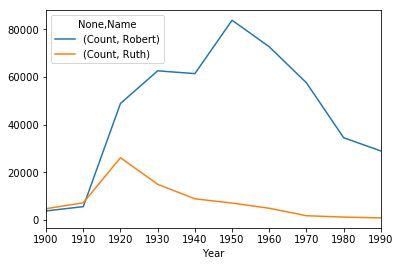

In [52]:
Ruth_Robert.unstack('Name').plot()

Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000)

In [55]:
all_years = {}
for year in range(1900, 2000, 5):
    all_years[year] = pd.read_csv(
        '/Users/staroverova/Netology/names/yob{}.txt'.format(year),
        names=['Name','Gender','Count']
    )
all_names = pd.concat(all_years, names=['Year', 'Number'])   
all_names.head(10) 

Name Gender  Count
Year Number                         
1900 0            Mary      F  16706
     1           Helen      F   6343
     2            Anna      F   6114
     3        Margaret      F   5304
     4            Ruth      F   4765
     5       Elizabeth      F   4096
     6        Florence      F   3920
     7           Ethel      F   3896
     8           Marie      F   3856
     9         Lillian      F   3414

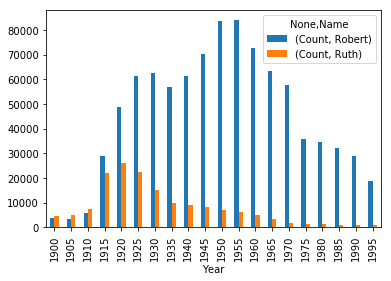

In [56]:
group_names = all_names.groupby([all_names.index.get_level_values(0), 'Name']).sum() 
Ruth_Robert2 = group_names.query('Name == ["Ruth", "Robert"]')
Ruth_Robert2.unstack('Name').plot.bar()

Построить круговую диаграмму по количеству ТОП-10 популярных имен, начинающихся на R за 1950 год

In [207]:
year_50 = pd.read_csv('/Users/staroverova/Netology/names/yob1950.txt', names=('Name', 'Gender', 'Count'))
year_50.head(10)

,Name,Gender,Count
0,Linda,F,80439
1,Mary,F,65485
2,Patricia,F,47948
3,Barbara,F,41559
4,Susan,F,38019
5,Nancy,F,29619
6,Deborah,F,29067
7,Sandra,F,28896
8,Carol,F,26163
9,Kathleen,F,25704


In [208]:
R_names = year_50[year_50['Name'].str.startswith('R')].sort_values(by='Count', ascending=False).head(10)

In [195]:
R_names

,Name,Gender,Count
6114,Robert,M,83575
6119,Richard,M,51014
6124,Ronald,M,29917
6139,Roger,M,12551
6143,Raymond,M,11180
35,Rebecca,F,9426
48,Ruth,F,7128
6163,Roy,M,6459
55,Rita,F,6425
6164,Ralph,M,6406


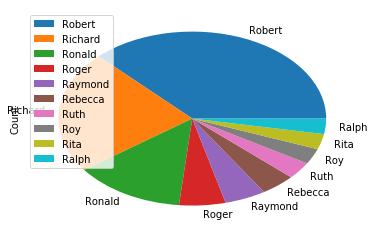

In [216]:
R_names.set_index(['Name']).plot.pie(y='Count')

Построить точечную диаграмму по количеству согласных букв в имени и частоте употребления за 100 лет

In [174]:
hundred_years = {}
for year in range(1900, 2000, 1):
    hundred_years[year] = pd.read_csv(
        '/Users/staroverova/Netology/names/yob{}.txt'.format(year),
        names=['Name','Gender','Count']
    )
names_for_count = pd.concat(hundred_years, names=['Year', 'Number'])   
names_for_count.shape

(1280423, 3)

In [175]:
names_for_count.head(5)

Name Gender  Count
Year Number                        
1900 0           Mary      F  16706
     1          Helen      F   6343
     2           Anna      F   6114
     3       Margaret      F   5304
     4           Ruth      F   4765

In [176]:
names_for_count2 = names_for_count.groupby(by='Name', as_index = False).sum() 

In [177]:
names_for_count2.sort_values(by='Count', ascending=False).head(10) #проверим, все ли сложилось, так сказать

,Name,Count
27005,James,4792265
29802,John,4719784
52434,Robert,4625173
44097,Michael,3991251
42595,Mary,3847492
66598,William,3634649
14725,David,3331516
52130,Richard,2486752
30363,Joseph,2266913
10531,Charles,2182139


In [169]:
names_for_count2.shape #проверяем, сложились ли имена

(68613, 2)

In [178]:
consonants = 'bcdfghjklmnpqrstvwxz'
names_for_count2['Consonats'] = names_for_count2.apply(lambda row: len([c for c in row.Name.lower() if c in consonants]), axis=1)
names_for_count2.head(15)   

,Name,Count,Consonats
0,Aadam,52,2
1,Aadil,71,2
2,Aaditya,19,2
3,Aage,7,1
4,Aagot,5,2
5,Aailiyah,5,2
6,Aailyah,27,2
7,Aaisha,77,2
8,Aajah,6,2
9,Aakash,370,3


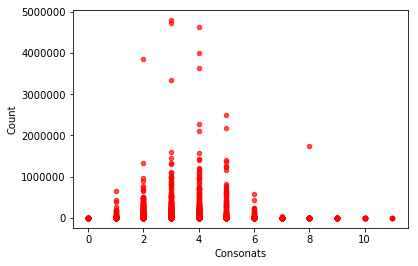

In [179]:
names_for_count2.plot.scatter(x='Consonats', y='Count', c='r', alpha=0.7) 

Попробуем вывести с именами, вот только их слишком много, поэтому сократим!

In [195]:
names_for_count3 = names_for_count2.sort_values(by='Count', ascending=False).head(20)
names_for_count3 

,Name,Count,Consonats
27005,James,4792265,3
29802,John,4719784,3
52434,Robert,4625173,4
44097,Michael,3991251,4
42595,Mary,3847492,2
66598,William,3634649,4
14725,David,3331516,3
52130,Richard,2486752,5
30363,Joseph,2266913,4
10531,Charles,2182139,5


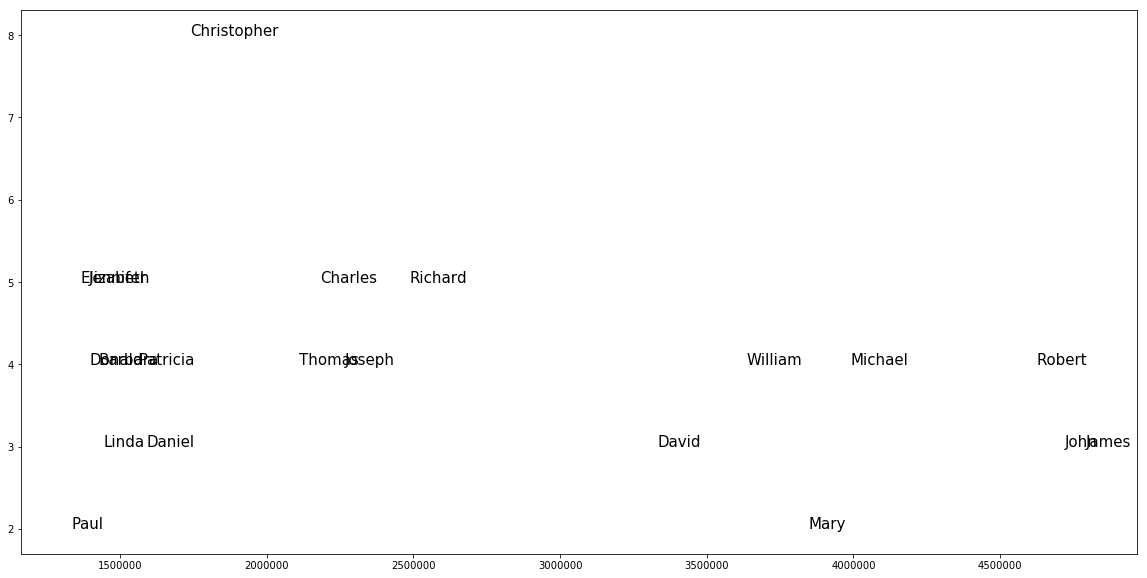

In [196]:
plt.figure(figsize = (20,10))
plt.scatter(names_for_count3.Count, names_for_count3.Consonats, s = names_for_count3.Consonats, c='pink', alpha = 0.01)
for item in names_for_count3.iterrows():
    item = item[1]
    plt.text(item.Count, item.Consonats, item['Name'], fontsize = 15)
plt.show()

Документация https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html